## IMDB


In [1]:
# importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.formula.api as smf

In [2]:
# abrir dataset
df_basics = pd.read_csv('C:/Users/camil/Desktop/Projeto Integrador/dados/title.basics.tsv.gz', compression='gzip', header=0 , quotechar='"', error_bad_lines=False, sep = '\t', na_values=['\\N'])

C:\Users\camil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


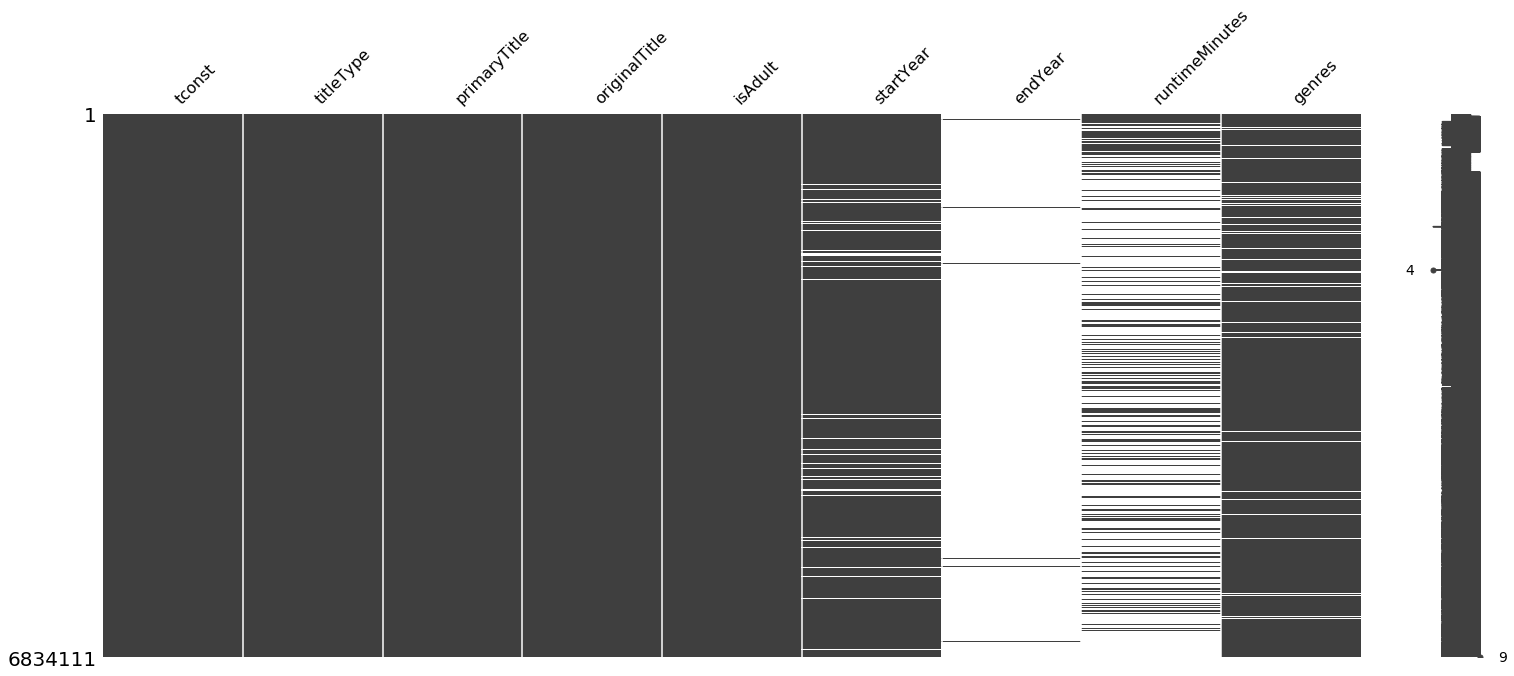

In [3]:
# conferir se exitem missing values
import missingno as msno
msno.matrix(df_basics)

In [ ]:
# imprimir as 6 primeiras linhas
df_basics.head()

In [ ]:
df_basics.info()

In [4]:
# converter em float
df_basics['year'] = df_basics['startYear'].astype(np.float)

# filtrar starYear >= 2000
basics = df_basics[(df_basics.year >= 2000) & (df_basics.year <= 2020)]

In [ ]:
#estatisticas descritivas do ano
basics.year.describe()

In [5]:
# renomear colunas para juntar os datasets
basics.rename(columns = {'primaryTitle': 'movie_name'}, inplace = True)

C:\Users\camil\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
basics.sort_values('year')

,tconst,titleType,movie_name,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,year
839201,tt0865545,tvMovie,Who's Aping Who? Social Climbing,Who's Aping Who? Social Climbing,0,2000.0,NaN,52,Documentary,2000.0
482417,tt0501559,tvEpisode,Episode dated 10 July 2000,Episode dated 10 July 2000,0,2000.0,NaN,NaN,News,2000.0
482416,tt0501558,tvEpisode,Episode dated 6 July 2000,Episode dated 6 July 2000,0,2000.0,NaN,NaN,News,2000.0
482415,tt0501557,tvEpisode,Episode dated 3 July 2000,Episode dated 3 July 2000,0,2000.0,NaN,NaN,News,2000.0
482414,tt0501556,tvEpisode,Episode dated 23 June 2000,Episode dated 23 June 2000,0,2000.0,NaN,NaN,News,2000.0
...,...,...,...,...,...,...,...,...,...,...
1168930,tt10350624,movie,Mimi From Rio,Mimi From Rio,0,2020.0,NaN,NaN,Adventure,2020.0
2119859,tt12010148,tvEpisode,The Porn Anomaly,The Porn Anomaly,1,2020.0,NaN,NaN,Adult,2020.0
6570800,tt9362620,movie,D.E.M.O.N.I.C. Stories,D.E.M.O.N.I.C. Stories,0,2020.0,NaN,NaN,Horror,2020.0
1169101,tt10350920,short,The Simplicity of Life,The Simplicity of Life,0,2020.0,NaN,NaN,"Comedy,Drama,Short",2020.0


## Rotten Tomatoes

[Kaggle](https://www.kaggle.com/aaronjun/rotten-tomato-1960-2020/data?select=rt_movie_review.csv)

### Rotten Info

In [7]:
# abrir df
df_rotten = pd.read_csv('C:/Users/camil/Desktop/Projeto Integrador/dados/rt_movie_info.csv', encoding = 'latin1', engine = 'python', delimiter = ',')

In [8]:
df_rotten.sort_values(by = 'movie_name')

,movie_link,movie_name,rating,genre,directors,writers,movie_info,poster_image,casts,in_theaters_date,...,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,audience_fresh_top_critics_count,audience_rotten_rotten_critics_count,tomatometer_avg_rating,audience_top_critics_avg_rating,score_sentiment,audience_avg_rating
10984,/m/771456469,#Screamers,NR,"Horror,Mystery & Suspense",Dean Matthew Ronalds,"Dean Matthew Ronalds,Tom Malloy (II)",Two internet gurus investigate the authenticit...,https://resizing.flixster.com/xLjHGklvO3znOH_N...,"Tom Malloy (II),Chris Bannow,Griffin Matthews,...","Apr 5, 2018",...,35.0,0,2,3,0,0,5.50,0.00,NEGATIVE,2.35
3537,/m/12713,'Breaker' Morant,PG,"Art House & International,Drama",Bruce Beresford,"David Stevens,Jonathan Hardy,Bruce Beresford,J...",One of the best dramas to emerge from Australi...,https://resizing.flixster.com/rtKMWA-9THxvTAqg...,"Edward Woodward,Jack Thompson,Bryan Brown,Rod ...","May 1, 1980",...,4935.0,0,22,0,0,0,8.45,0.00,POSITIVE,4.24
4533,/m/180886929,'Night Mother,PG-13,Drama,NaN,Marsha Norman,'Night. Mother was adapted by Marsha Norman fr...,https://resizing.flixster.com/gxVXb9MO-yvVgkhI...,"Sissy Spacek,Anne Bancroft,Ed Berke,Carol Robb...","Sep 12, 1986",...,2460.0,1,2,1,0,1,6.75,0.00,POSITIVE,4.20
4546,/m/600346354,'Round Midnight,R,"Drama,Musical & Performing Arts",Bertrand Tavernier,"David Rayfiel,Bertrand Tavernier",A French music lover befriends a once-great Am...,https://resizing.flixster.com/tKoL21NRgs_39_at...,"Dexter Gordon,FranÃ§ois Cluzet,Gabrielle Haker...","Oct 3, 1986",...,2674.0,8,20,0,8,0,8.08,8.21,POSITIVE,4.24
6589,/m/12284,'Til There Was You,PG-13,Comedy,Scott Winant,Winnie Holzman,This romantic comedy is the first film from tw...,https://resizing.flixster.com/ogTgtN0p20hiJlaX...,"Jeanne Tripplehorn,Dylan McDermott,Sarah Jessi...","May 30, 1997",...,12673.0,15,2,37,0,15,3.96,3.95,NEGATIVE,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11792,/m/770942582,Zusje,NR,"Art House & International,Drama",Robert Jan Westdijk,"Jos Driessen,Robert Jan Westdijk",This disturbing yet highly distinguished Dutch...,https://resizing.flixster.com/QwvFXTxo16QuYWFf...,"Martijn Zuidewind,Kim van Kooten,Roeland Fernh...",NaN,...,31.0,0,1,0,0,0,8.00,0.00,NEGATIVE,3.19
10748,/m/771466913,iBoy,NR,"Action & Adventure,Drama,Mystery & Suspense,Sc...",Adam Randall (II),"Joe Barton (VIII) ,Mark Denton,Jonny Stockwood",After being shot while trying to stop a violen...,https://resizing.flixster.com/q9TFPi5u6-Et9AOm...,"Bill Milner,Maisie Williams,Miranda Richardson...","Jan 27, 2017",...,768.0,3,9,4,2,1,5.60,5.33,NEGATIVE,3.06
10747,/m/770805755,xXx: Return of Xander Cage,PG-13,"Action & Adventure,Drama",D.J. Caruso,NaN,The third explosive chapter of the blockbuster...,https://resizing.flixster.com/BKvBMWBf4elVv8OJ...,"Vin Diesel,Donnie Yen,Deepika Padukone,Tony Ja...","Jan 20, 2017",...,25219.0,28,64,78,11,17,4.83,4.63,NEGATIVE,2.86
1741,/m/371641176,Ã Meia-Noite Levarei Sua Alma (At Midnight I'...,NR,"Art House & International,Drama,Horror,Mystery...",JosÃ© Mojica Marins,JosÃ© Mojica Marins,Brazilian horror auteur Jose Mojica Marins bot...,https://resizing.flixster.com/c4G_PL1sB4fWJljC...,"JosÃ© Mojica Marins,Magda Mei,Nivaldo de Lima,...","Nov 9, 1964",...,1206.0,0,4,2,0,0,6.25,0.00,POSITIVE,3.64


In [9]:
df_movies = df_rotten[df_rotten.groupby('movie_name')['movie_name'].transform('size') > 1]

In [ ]:
df_movies.T

In [10]:
# remover linhas duplicadas

df_rotten.drop_duplicates(subset ="movie_name", 
                     keep = False, inplace = True)

In [11]:
# conferir se todas linhas duplicadas foram excluidas
sum(df_rotten.movie_name.value_counts() > 1)

0

In [12]:
# imprimir informacoes sobre o df
df_rotten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11313 entries, 0 to 13000
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   movie_link                            11313 non-null  object 
 1   movie_name                            11313 non-null  object 
 2   rating                                11313 non-null  object 
 3   genre                                 11279 non-null  object 
 4   directors                             11002 non-null  object 
 5   writers                               9528 non-null   object 
 6   movie_info                            10823 non-null  object 
 7   poster_image                          11313 non-null  object 
 8   casts                                 11008 non-null  object 
 9   in_theaters_date                      9511 non-null   object 
 10  on_streaming_date                     9004 non-null   object 
 11  runtime_in_minu

In [13]:
# transformar em float
df = df_rotten.copy()
df['year'] = df['in_theaters_date'].str[-5:].astype(np.float)


# filtrar year >= 2000
df = df[(df.year >= 2000) & (df.year <= 2020)]

In [ ]:
df.year

## Juntar IMDB e Rotten Tomatoes

Criar uma nova coluna que junte o título do filme com o ano.

In [14]:
df['movieyear'] = df.year.astype(str) + df.movie_name.astype(str)

In [15]:
basics['movieyear'] = basics.year.astype(str) + basics.movie_name.astype(str)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
# left join por filme e ano
#df_rt = df.merge(basics, on = ['movieyear'], how = 'left')
df_rt = df.join(basics.set_index('movieyear'), on = 'movieyear', how = 'left', lsuffix='_rotten', rsuffix='_imdb')

In [17]:
df_rt.shape

(6807, 43)

In [18]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [24]:
basics.dtypes

tconst             object
titleType          object
movie_name         object
originalTitle      object
isAdult             int64
startYear         float64
endYear           float64
runtimeMinutes     object
genres             object
year              float64
movieyear          object
dtype: object

In [ ]:
import fuzzymatcher
from fuzzymatcher import link_table, fuzzy_left_join


# The link table potentially contains several matches for each record
df_rt2 = fuzzymatcher.fuzzy_left_join(df, basics, left_on = 'movieyear', right_on = 'movieyear')

In [27]:
import fuzzy_pandas as fpd

df_rt2 = fpd.fuzzy_merge(df, basics,
                left_on=['movie_name'],
                right_on=['movie_name'],
                ignore_case=True,
                          keep='match')

KeyboardInterrupt: 

In [ ]:
df_rt2

In [ ]:
df_rt2 = df.merge(basics,left_on='key',right_on='movieyear')

In [23]:
df.shape

(3522, 33)

In [24]:
basics.shape

(4597138, 11)

In [25]:
df_rt.head()

,movie_link,movie_name_rotten,rating,genre,directors,writers,movie_info,poster_image,casts,in_theaters_date,...,tconst,titleType,movie_name_imdb,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,year_imdb
7227,/m/14690,Triumph of the Spirit,R,Drama,Robert M. Young,"Robert M. Young,Millard Lampell,Andrzej Krakow...",Triumph of the Spirit is the true story of Sal...,https://resizing.flixster.com/UTFpA9rJ539pMPlH...,"Willem Dafoe,Edward James Olmos,Robert Loggia,...","Jan 1, 2000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7228,/m/770679185,Black Rainbow,R,"Drama,Horror,Mystery & Suspense",Mike Hodges,Mike Hodges,British director Mike Hodges brought an extra ...,https://resizing.flixster.com/YF_qLQK6rnBjVToR...,"Rosanna Arquette,Jason Robards,Tom Hulce,Ron R...","Jan 1, 2000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7229,/m/771321652,The Sorcerers,NR,Horror,Michael Reeves,Michael Reeves,NaN,https://www.rottentomatoes.com/assets/pizza-pi...,NaN,"Jan 1, 2000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7230,/m/18680,Buzz Lightyear of Star Command: The Adventure ...,G,"Animation,Comedy,Kids & Family",Tad Stones,NaN,"Buzz Lightyear, the plastic spaceman who helpe...",https://resizing.flixster.com/HcjAepRboO9x5B2C...,"Tim Allen,Nicole Sullivan,Larry Miller,R. Lee ...","Jan 1, 2000",...,tt0181196,video,Buzz Lightyear of Star Command: The Adventure ...,Buzz Lightyear of Star Command: The Adventure ...,0.0,2000.0,NaN,70,"Action,Adventure,Animation",2000.0
7231,/m/9750,Back to the Secret Garden,G,"Action & Adventure,Drama,Kids & Family,Science...",Michael Tuchner,NaN,Although Frances Hodgson Burnett did not feel ...,https://resizing.flixster.com/WHUj8b36AL8K28pd...,"Camilla Belle,Joan Plowright,George Baker,Cher...","Jan 1, 2000",...,tt0233277,movie,Back to the Secret Garden,Back to the Secret Garden,0.0,2000.0,NaN,100,"Family,Fantasy",2000.0


In [26]:
df_rt.movieyear.value_counts()

2015.0Jurassic World                22
2019.0Avengers: Endgame             21
2018.0Avengers: Infinity War        20
2010.0Date Night                    20
2016.0Captain America: Civil War    17
                                    ..
2016.0Queen of Katwe                 1
2009.0Dead Snow (DÃ¸d snÃ¸)          1
2002.0Happy Times                    1
2006.0Snakes on a Plane              1
2007.0We Own the Night               1
Name: movieyear, Length: 3522, dtype: int64

In [27]:
df_dup = df_rt[df_rt.groupby('movieyear')['movieyear'].transform('size') > 1]

In [28]:
df_dup.head()

,movie_link,movie_name_rotten,rating,genre,directors,writers,movie_info,poster_image,casts,in_theaters_date,...,tconst,titleType,movie_name_imdb,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,year_imdb
7263,/m/10914,28 Days,PG-13,"Comedy,Drama",Betty Thomas,Susannah Grant,Gwen Cummings is a successful New York writer ...,https://resizing.flixster.com/EZ4CNd7thD2XSs1Y...,"Sandra Bullock,Viggo Mortensen,Dominic West,El...","Feb 8, 2000",...,tt0191754,movie,28 Days,28 Days,0.0,2000.0,NaN,103,"Comedy,Drama",2000.0
7263,/m/10914,28 Days,PG-13,"Comedy,Drama",Betty Thomas,Susannah Grant,Gwen Cummings is a successful New York writer ...,https://resizing.flixster.com/EZ4CNd7thD2XSs1Y...,"Sandra Bullock,Viggo Mortensen,Dominic West,El...","Feb 8, 2000",...,tt0594799,tvEpisode,28 Days,28 Days,0.0,2000.0,NaN,15,"Documentary,Short",2000.0
7279,/m/12902,Erin Brockovich,R,"Comedy,Drama",Steven Soderbergh,"Richard LaGravenese,Steven Soderbergh,Susannah...",Julia Roberts stars in this legal drama based ...,https://resizing.flixster.com/UiSfvP6QNbSt6Nsu...,"Julia Roberts,Aaron Eckhart,Albert Finney,Marg...","Mar 17, 2000",...,tt0195685,movie,Erin Brockovich,Erin Brockovich,0.0,2000.0,NaN,131,"Biography,Drama",2000.0
7279,/m/12902,Erin Brockovich,R,"Comedy,Drama",Steven Soderbergh,"Richard LaGravenese,Steven Soderbergh,Susannah...",Julia Roberts stars in this legal drama based ...,https://resizing.flixster.com/UiSfvP6QNbSt6Nsu...,"Julia Roberts,Aaron Eckhart,Albert Finney,Marg...","Mar 17, 2000",...,tt1457850,tvEpisode,Erin Brockovich,Erin Brockovich,0.0,2000.0,NaN,NaN,Family,2000.0
7293,/m/13191,Rules of Engagement,R,"Action & Adventure,Drama,Mystery & Suspense",William Friedkin,Stephen Gaghan,"In this drama, two U.S. Marines who stood side...",https://resizing.flixster.com/ZRf1k5A8-Q3EOoeT...,"Tommy Lee Jones,Samuel L. Jackson,Ben Kingsley...","Apr 7, 2000",...,tt0160797,movie,Rules of Engagement,Rules of Engagement,0.0,2000.0,NaN,128,"Drama,Thriller,War",2000.0


In [29]:
df_rt.drop_duplicates(subset ="movieyear", 
                     keep = False, inplace = True)

In [30]:
df_rt.shape

(2353, 43)

In [31]:
basics_test = basics[['originalTitle', 'movie_name']]

In [32]:
basics_test.sort_values('movie_name')

,originalTitle,movie_name
3135041,!Que ve el Bisbe!,!Que ve el Bisbe!
2777981,Women Art Revolution,!Women Art Revolution
3428700,#,#
5346689,#,#
4008766,#,#
...,...,...
3037719,NaN,NaN
4296325,NaN,NaN
4905414,NaN,NaN
6183589,NaN,NaN


In [33]:
df_test = df_rt[['originalTitle', 'movie_name_imdb']]

In [34]:
df_test.sort_values('movie_name_imdb')

,originalTitle,movie_name_imdb
9018,"10,000 B.C.","10,000 B.C."
8191,11:14,11:14
8907,12,12
10382,12 gam ngap,12 Golden Ducks
7702,13 Moons,13 Moons
...,...,...
11147,NaN,NaN
11148,NaN,NaN
11154,NaN,NaN
11162,NaN,NaN


#### in_theaters_date

In [35]:
# converter para formato de data

## converter para data
df_rt['in_theaters_date'] = df_rt.in_theaters_date.astype('datetime64')

## pegar apenas o ano
df_rt['date_year'] = df_rt.in_theaters_date.dt.year

## pegar apenas o mes
df_rt['date_month'] = df_rt.in_theaters_date.dt.month

## filtrar date_year >= 2010
df_rt2 = df_rt[df_rt.date_year >= 2000]

In [36]:
print("Agora o dataset tem:", df_rt2.shape[0], "filmes")

Agora o dataset tem: 2353 filmes


#### tomatometer

In [37]:
df_rt2.tomatometer_status.value_counts()

rotten             930
certified_fresh    527
fresh              522
Name: tomatometer_status, dtype: int64

In [38]:
print(round(df_rt2.tomatometer_status.count()/len(df_rt2) * 100, 2),'% do dataset tem tomatometer status')

84.11 % do dataset tem tomatometer status


In [39]:
# criar uma variavel dummy com status do tomatometer 
## rotten = 0
## fresh|certified_fresh = 1
df_rt2['status_dummy'] = df_rt2.loc[:, 'tomatometer_status'].replace({'rotten': 0,
                                                      'fresh': 1,
                                                      'certified_fresh':1})

In [40]:
df_rt2['status_dummy'].value_counts()

1.0    1049
0.0     930
Name: status_dummy, dtype: int64

#### movie_info

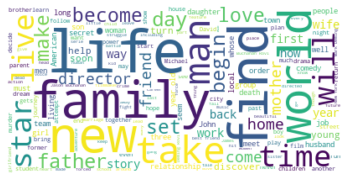

In [41]:
# plotar as palavras mais frquentes nos filmes 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# combinar linhas multiplas em um objeto
text = df_rt2['movie_info'].str.cat(sep='/ ')

# Ciar uma lista de STOPWORDS:
stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "tree", "four", "five", "six", "seven", "eight", "nine", "film"])


# Criar e gerar uma nuvem de palavra:
wc= WordCloud(stopwords = stopwords, background_color="white").generate(text)

# Mostrar a imagem gerada:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#wc.to_file("rotten.png")
#codigo adaptado de: https://www.datacamp.com/community/tutorials/wordcloud-python

##### Rotten and Fresh Wordclouds

In [42]:
text_rotten = df_rt2.loc[('status_dummy' == 0):,'movie_info'].str.cat(sep='/ ')
text_fresh = df_rt2.loc[('status_dummy' == 1):,'movie_info'].str.cat(sep='/ ')

stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "tree", "four", "five", "six", "seven", "eight", "nine", "film"])


wc_rotten= WordCloud(stopwords = stopwords, background_color="white").generate(text_rotten)
wc_fresh = WordCloud(stopwords = stopwords, background_color="white").generate(text_fresh)

#adapted code from: https://www.datacamp.com/community/tutorials/wordcloud-python

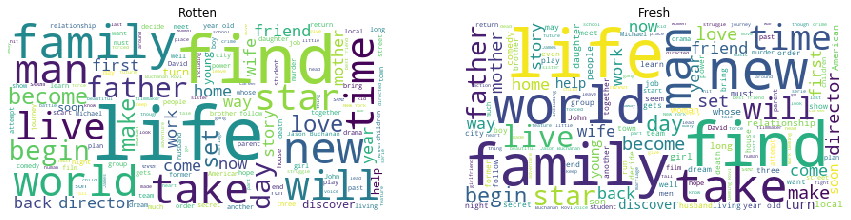

In [43]:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(wc_rotten)
axarr[0].axis("off")
axarr[0].set_title("Rotten")
axarr[1].imshow(wc_fresh)
axarr[1].axis("off")
axarr[1].set_title("Fresh")
plt.show()

### Rotten Review

In [44]:
review = pd.read_csv('C:/Users/camil/Desktop/Projeto Integrador/dados/rt_movie_review.csv')

In [45]:
review.head()

,movie_link,movie_id,review_date,critic_publication,critic_icon,critic_top,critic_score,review_content
0,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,01/07/2004,Arizona Republic,fresh,Top Critic,4/5,"Has more belly laughs than 10 studio-produced,..."
1,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,01/07/2004,Minneapolis Star Tribune,rotten,Top Critic,0.5/4,Calling this story about a quirky high-school ...
2,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,02/06/2004,Variety,rotten,Top Critic,NaN,There are lots of laughs for those who enjoy t...
3,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,02/06/2004,Slant Magazine,rotten,NaN,.5/4,For those who think there'e nothing funnier th...
4,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,02/07/2004,St. Paul Pioneer Press,fresh,NaN,3.5/4,We laugh at all the nerdy behavior in the movi...


In [46]:
review.shape

(460245, 8)

In [47]:
df_rt2.rename(columns = {'movie_link': 'movie_id'}, inplace = True)

In [48]:
## right join the two rotten tomatoes df
rotten = review.merge(df_rt2, on = 'movie_id', how = 'right')

In [49]:
rotten.shape

(162135, 53)

In [50]:
round(review.shape[1]/rotten.shape[1] * 100, 2)

15.09

In [51]:
rotten.head()

,movie_link,movie_id,review_date,critic_publication,critic_icon,critic_top,critic_score,review_content,movie_name_rotten,rating,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,year_imdb,date_year,date_month,status_dummy
0,https://www.rottentomatoes.com/m/the_notebook,/m/10015,03/07/2004,Laramie Movie Scope,fresh,NaN,B+,Gosling and McAdams sizzle with romantic chemi...,The Notebook,PG-13,...,The Notebook,0.0,2004.0,NaN,123,"Drama,Romance",2004.0,2004,6,0.0
1,https://www.rottentomatoes.com/m/the_notebook,/m/10015,03/07/2004,ViewLondon,fresh,NaN,3/5,"Despite the occasional flaw, The Notebook is a...",The Notebook,PG-13,...,The Notebook,0.0,2004.0,NaN,123,"Drama,Romance",2004.0,2004,6,0.0
2,https://www.rottentomatoes.com/m/the_notebook,/m/10015,03/07/2004,Austin Chronicle,fresh,NaN,3/5,What a glorious weepie The Notebook might have...,The Notebook,PG-13,...,The Notebook,0.0,2004.0,NaN,123,"Drama,Romance",2004.0,2004,6,0.0
3,https://www.rottentomatoes.com/m/the_notebook,/m/10015,03/07/2004,Hartford Courant,fresh,NaN,3/4,NaN,The Notebook,PG-13,...,The Notebook,0.0,2004.0,NaN,123,"Drama,Romance",2004.0,2004,6,0.0
4,https://www.rottentomatoes.com/m/the_notebook,/m/10015,03/07/2004,Baltimore Sun,rotten,NaN,2/4,"From one climax to the next, the filmmakers ra...",The Notebook,PG-13,...,The Notebook,0.0,2004.0,NaN,123,"Drama,Romance",2004.0,2004,6,0.0


In [52]:
rotten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162135 entries, 0 to 162134
Data columns (total 53 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   movie_link                            161386 non-null  object        
 1   movie_id                              162135 non-null  object        
 2   review_date                           161386 non-null  object        
 3   critic_publication                    161386 non-null  object        
 4   critic_icon                           161386 non-null  object        
 5   critic_top                            45816 non-null   object        
 6   critic_score                          119444 non-null  object        
 7   review_content                        154853 non-null  object        
 8   movie_name_rotten                     162135 non-null  object        
 9   rating                                162135 non-null  obje

In [53]:
#filmes com mais reviews
rotten.movie_name_imdb.value_counts()

Once Upon a Time In Hollywood          530
If Beale Street Could Talk             339
Carol                                  304
The Florida Project                    299
Zero Dark Thirty                       294
                                      ... 
Halloweentown II: Kalabar's Revenge      1
The 39 Steps                             1
Hello Herman                             1
Buena Vista Social Club: Adios           1
Finding Bliss                            1
Name: movie_name_imdb, Length: 1307, dtype: int64

Text(0, 0.5, '')

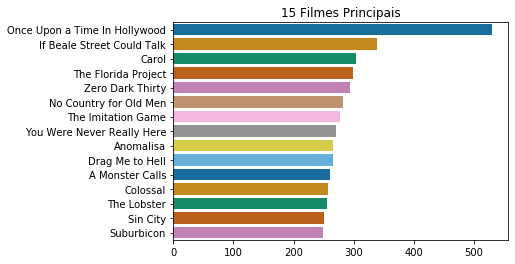

In [54]:
sns.countplot(y = rotten.movie_name_imdb, order = rotten.movie_name_imdb.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('15 Filmes Principais')
plt.xlabel('')
plt.ylabel('')

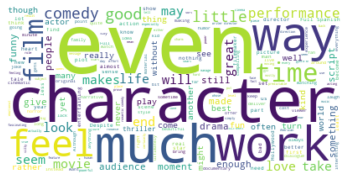

In [55]:
# plotar as palavras mais frequentes no conteudo da review 
text_review = rotten['review_content'].str.cat(sep='/ ')


stopwords = set(STOPWORDS)
stopwords.update(['movie', 'review', 'film', 'one', 'two', 'three', 'story', 'make'])


wc_review= WordCloud(stopwords = stopwords, background_color="white").generate(text_review)

plt.imshow(wc_review, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
review_rotten = rotten.loc[('status_dummy' == 0):,'review_content'].str.cat(sep='/ ')
review_fresh = rotten.loc[('status_dummy' == 1):,'review_content'].str.cat(sep='/ ')

stopwords = set(STOPWORDS)
stopwords.update(['movie', 'review', 'film', 'one', 'two', 'three', 'story', 'make'])


wc_rr= WordCloud(stopwords = stopwords, background_color="white").generate(review_rotten)
wc_rf = WordCloud(stopwords = stopwords, background_color="white").generate(review_fresh)

#adapted code from: https://www.datacamp.com/community/tutorials/wordcloud-python

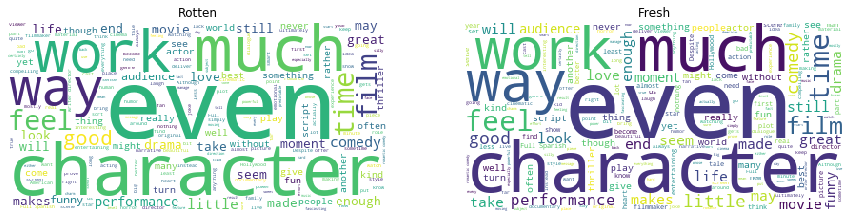

In [57]:
f, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(wc_rr)
ax[0].axis("off")
ax[0].set_title("Rotten")
ax[1].imshow(wc_rf)
ax[1].axis("off")
ax[1].set_title("Fresh")
plt.show()

#### Genres

In [58]:
rotten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162135 entries, 0 to 162134
Data columns (total 53 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   movie_link                            161386 non-null  object        
 1   movie_id                              162135 non-null  object        
 2   review_date                           161386 non-null  object        
 3   critic_publication                    161386 non-null  object        
 4   critic_icon                           161386 non-null  object        
 5   critic_top                            45816 non-null   object        
 6   critic_score                          119444 non-null  object        
 7   review_content                        154853 non-null  object        
 8   movie_name_rotten                     162135 non-null  object        
 9   rating                                162135 non-null  obje

#### Directors

In [59]:
rotten.directors.describe()

count          161782
unique           1920
top       Woody Allen
freq             1089
Name: directors, dtype: object

Text(0, 0.5, '')

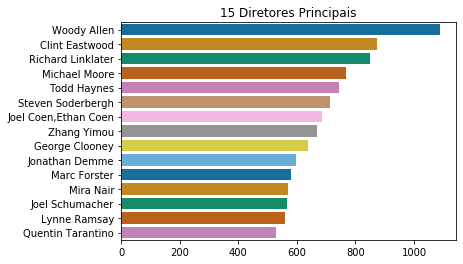

In [60]:
sns.countplot(y = rotten.directors, order=rotten.directors.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('15 Diretores Principais')
plt.xlabel('')
plt.ylabel('')

#### Genres

In [61]:
rotten.genres.value_counts()

Comedy,Drama,Romance        6704
Drama                       5417
Comedy,Romance              5172
Comedy,Drama                4242
Drama,Romance               4030
                            ... 
Comedy,Documentary,Short       1
Comedy,Mystery,Thriller        1
Adventure,Comedy,Crime         1
Action,Crime,Sci-Fi            1
Crime                          1
Name: genres, Length: 268, dtype: int64

In [62]:
#Criar um df que separa a coluna de Genres 
df_genres = rotten.assign(var1=rotten.genres.str.split(',')).explode('var1').reset_index(drop=True)

#Remover espacos brancos no comeco da string:
df_genres['var1'] = df_genres.var1.str.lstrip()

Text(0, 0.5, '')

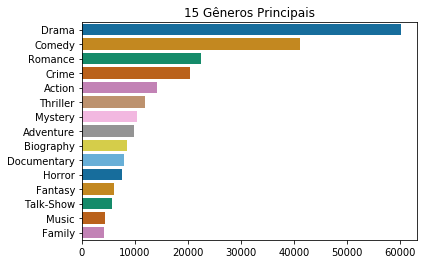

In [63]:
sns.countplot(y =df_genres.var1, order=df_genres.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('15 Gêneros Principais')
plt.xlabel('')
plt.ylabel('')

### Fresh Movies têm um maior box office?

In [64]:
rotten.box_office.describe()

count       122371
unique        1128
top       $200,000
freq           802
Name: box_office, dtype: object

In [65]:
rotten_df = rotten.copy()
rotten_df['box_office'] = rotten_df['box_office'].str.replace(',', '').str.replace('$', '').astype(float)

In [66]:
print(round(sum(rotten_df['box_office'].isnull())/len(rotten_df) * 100, 2),'% dos dados na coluna box_office são NaN.')
print(round(sum(rotten_df['box_office'][rotten_df.status_dummy == 0].isnull())/len(rotten_df) * 100, 2),'% dos dados na coluna box_office dos rotten movies são NaN.')
print(round(sum(rotten_df['box_office'][rotten_df.status_dummy == 1].isnull())/len(rotten_df) * 100, 2),'% dos dados na coluna box_office dos fresh movies são NaN.')

24.53 % dos dados na coluna box_office são NaN.
8.84 % dos dados na coluna box_office dos rotten movies são NaN.
15.46 % dos dados na coluna box_office dos fresh movies são NaN.


In [67]:
# substituir NaNs com a media
rotten_df['box_office'].fillna((rotten_df['box_office'].mean()), inplace=True)

# conferir se realmente substituiu
print(round(sum(rotten_df['box_office'].isnull())/len(rotten_df) * 100, 2))

0.0


In [68]:
print('Em média os filmes classificados como rotten têm um boxoffice de', rotten_df.box_office[rotten_df.status_dummy == 0].mean())
print('Em média os filmes classificados como fresh têm um boxoffice de', rotten_df.box_office[rotten_df.status_dummy == 1].mean())
print('A differença das duas médias é de', rotten_df.box_office[rotten_df.status_dummy == 0].mean() - rotten_df.box_office[rotten_df.status_dummy == 1].mean())

Em média os filmes classificados como rotten têm um boxoffice de 33053539.682165664
Em média os filmes classificados como fresh têm um boxoffice de 23043676.887385726
A differença das duas médias é de 10009862.794779938


Text(0, 0.5, '')

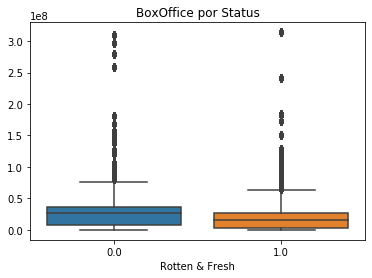

In [69]:
sns.boxplot(y =rotten_df.box_office, x = rotten_df.status_dummy)
plt.title('BoxOffice por Status')
plt.xlabel('Rotten & Fresh')
plt.ylabel('')

In [70]:
import scipy.stats

scipy.stats.ttest_ind(rotten_df.box_office, rotten_df.status_dummy, nan_policy='omit')

Ttest_indResult(statistic=300.53818663733193, pvalue=0.0)

In [71]:
function1 = ''' box_office ~ status_dummy '''
linear1 = smf.ols(function1, rotten_df).fit()
print(linear1.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3019.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:52:48   Log-Likelihood:            -3.0443e+06
No. Observations:              161761   AIC:                         6.089e+06
Df Residuals:                  161759   BIC:                         6.089e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.305e+07    1.4e+05    236.612   